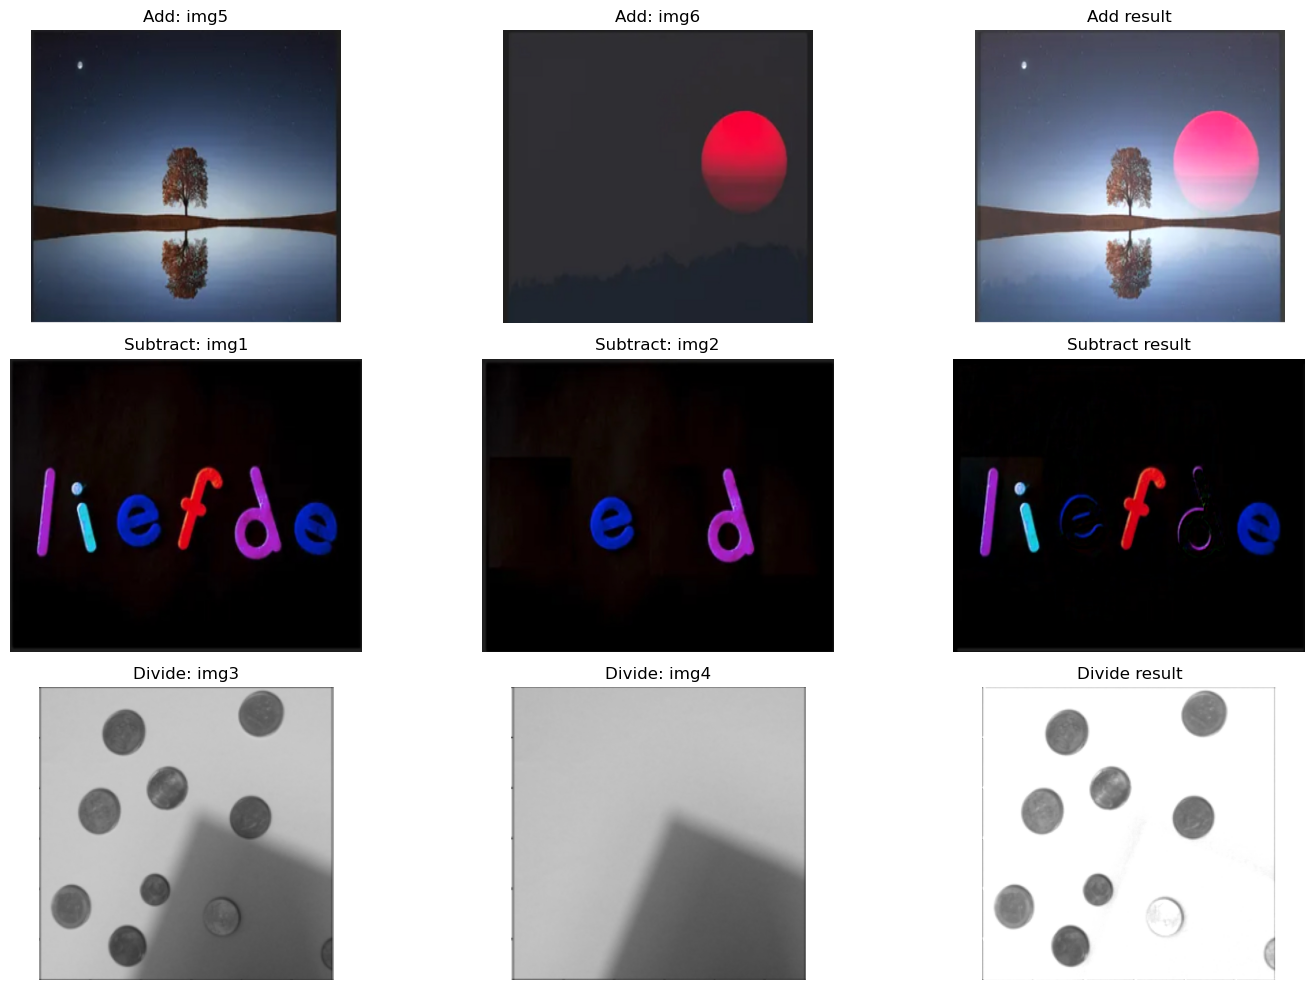

In [1]:
import cv2
import matplotlib.pyplot as plt

# 이미지 불러오기
img1 = cv2.imread("/Users/a1/ComputerVision/IMG_F35DC896D9F1-1.jpeg")
img2 = cv2.imread("/Users/a1/ComputerVision/IMG_4A3F3D081431-1.jpeg")
img3 = cv2.imread("/Users/a1/ComputerVision/IMG_F49ADDF9BF9A-1.jpeg")
img4 = cv2.imread("/Users/a1/ComputerVision/IMG_3F4FD530FF17-1.jpeg")
img5 = cv2.imread("/Users/a1/ComputerVision/IMG_1CED889FC02B-1.jpeg")
img6 = cv2.imread("/Users/a1/ComputerVision/IMG_B69555AC8D8C-1.jpeg")

# 이미지 로드 확인
if any(img is None for img in [img1, img2, img3, img4, img5, img6]):
    raise FileNotFoundError("이미지 로드 실패! 파일 이름/경로/확장자 확인해봐.")

# 크기 맞추기
img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))
img4_resized = cv2.resize(img4, (img3.shape[1], img3.shape[0]))
img6_resized = cv2.resize(img6, (img5.shape[1], img5.shape[0]))

# 산술 연산
add_img = cv2.add(img5, img6_resized)              # 덧셈
sub_img = cv2.subtract(img1, img2_resized)         # 뺄셈
div_img = cv2.divide(img3, img4_resized, scale=255.0)  # 나눗셈

# 출력할 이미지/제목 배열 구성
titles = [
    "Add: img5", "Add: img6", "Add result",
    "Subtract: img1", "Subtract: img2", "Subtract result",
    "Divide: img3", "Divide: img4", "Divide result"
]

images = [
    img5, img6_resized, add_img,
    img1, img2_resized, sub_img,
    img3, img4_resized, div_img
]

# 결과 출력
plt.figure(figsize=(15, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    # OpenCV는 BGR이므로 matplotlib에서 RGB로 바꿔줘야 정상 색상으로 나옴
    plt.imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
    plt.title(titles[i])
    plt.axis("off")

plt.tight_layout()
plt.show()


Shape: (1489, 1000)
[[0.5       0.5015015 0.503003  ... 1.996997  1.9984985 2.       ]
 [0.5       0.5015015 0.503003  ... 1.996997  1.9984985 2.       ]
 [0.5       0.5015015 0.503003  ... 1.996997  1.9984985 2.       ]
 ...
 [0.5       0.5015015 0.503003  ... 1.996997  1.9984985 2.       ]
 [0.5       0.5015015 0.503003  ... 1.996997  1.9984985 2.       ]
 [0.5       0.5015015 0.503003  ... 1.996997  1.9984985 2.       ]]


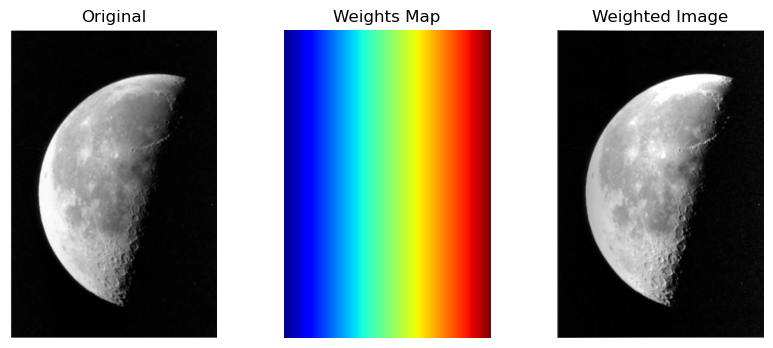

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 이미지 불러오기 (흑백)
img = cv2.imread("/Users/a1/ComputerVision/IMG_D1ADBE53D4B0-1.jpeg", cv2.IMREAD_GRAYSCALE)
h, w = img.shape

# 가중치 행렬 생성 (예: 왼쪽→오른쪽 갈수록 값 커짐)
weights = np.linspace(0.5, 2.0, w)        # 0.5배 ~ 2배
weights = np.tile(weights, (h, 1))        # h행으로 반복해서 (h,w) 형태로 만듦

print("Shape:", weights.shape)
print(weights)

# 픽셀별 곱셈
weighted_img = np.clip(img.astype(np.float32) * weights, 0, 255).astype(np.uint8)

# 시각화
plt.figure(figsize=(10,4))
plt.subplot(1,3,1); plt.imshow(img, cmap='gray'); plt.title("Original"); plt.axis("off")
plt.subplot(1,3,2); plt.imshow(weights, cmap='jet'); plt.title("Weights Map"); plt.axis("off")
plt.subplot(1,3,3); plt.imshow(weighted_img, cmap='gray'); plt.title("Weighted Image"); plt.axis("off")
plt.show()


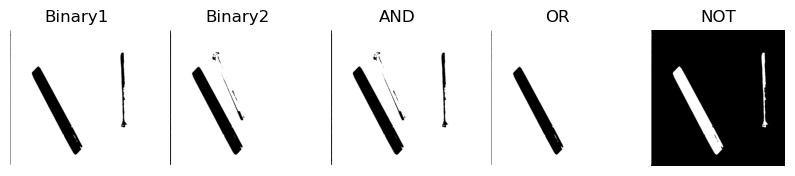

In [3]:
# 논리 연산 (이미지를 이진화 후 수행)
img1 = cv2.imread("/Users/a1/ComputerVision/IMG_C042A1B77B91-1.jpeg")
img2 = cv2.imread("/Users/a1/ComputerVision/IMG_0D2923BD54F7-1.jpeg")
img3 = cv2.imread("/Users/a1/ComputerVision/IMG_F49ADDF9BF9A-1.jpeg")
img4 = cv2.imread("/Users/a1/ComputerVision/IMG_3F4FD530FF17-1.jpeg")
h, w = img1.shape[:2]
img2_resized = cv2.resize(img2, (w, h))
_, bin1 = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)
_, bin2 = cv2.threshold(img2_resized, 127, 255, cv2.THRESH_BINARY)

and_img = cv2.bitwise_and(bin1, bin2)   # AND
or_img  = cv2.bitwise_or(bin1, bin2)    # OR
not_img = cv2.bitwise_not(bin1)         # NOT (img1 기준)

titles = ['Binary1', 'Binary2', 'AND', 'OR', 'NOT']
images = [bin1, bin2, and_img, or_img, not_img]

plt.figure(figsize=(10,6))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()


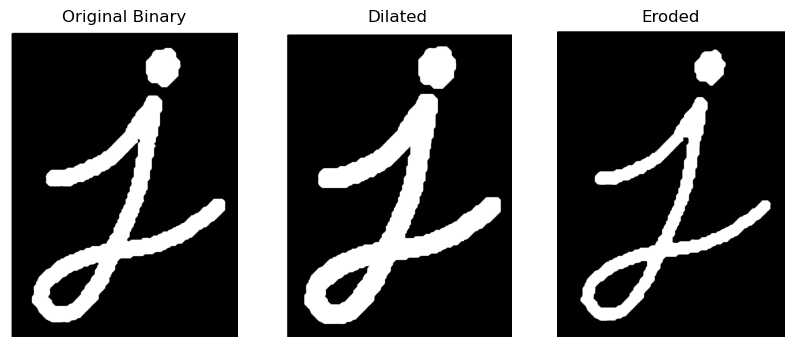

In [4]:
# 이진화된 이미지 준비
img1 = cv2.imread("/Users/a1/ComputerVision/IMG_5FA5F4F58D42-1.jpeg")
_, binary = cv2.threshold(img1, 127, 255, cv2.THRESH_BINARY)

# 커널(구조 요소) 정의
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (15,15))

# 팽창(Dilation) & 침식(Erosion)
dilated  = cv2.dilate(binary, kernel, iterations=1)
eroded   = cv2.erode(binary, kernel, iterations=1)

titles = ['Original Binary', 'Dilated', 'Eroded']
images = [binary, dilated, eroded]

plt.figure(figsize=(10,4))
for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')
plt.show()

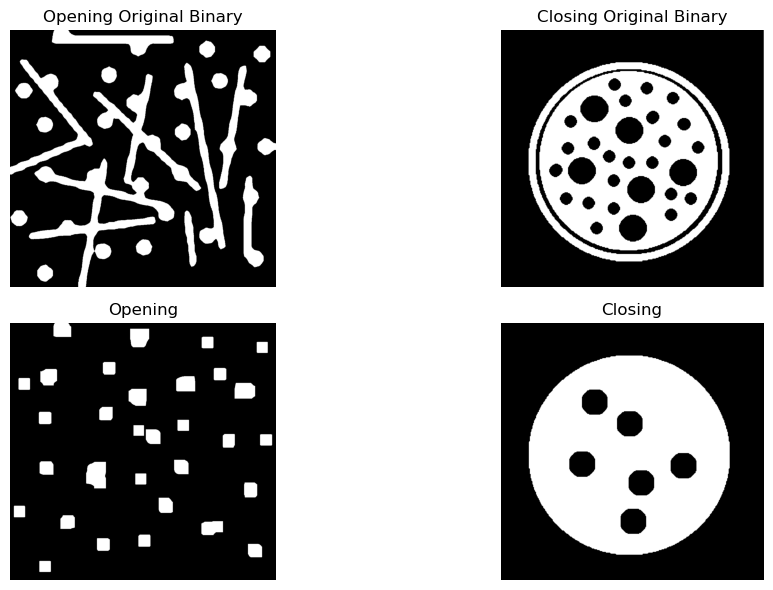

In [5]:
import cv2
import matplotlib.pyplot as plt

# 이미지 불러오기 → 흑백 → 이진화
img2 = cv2.imread("/Users/a1/ComputerVision/IMG_6BE7E61C9979-1.jpeg") #closing
img = cv2.imread("/Users/a1/ComputerVision/4B59-8F46-8D-0.jpeg") #opening

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary1 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
_, binary2 = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)

# 커널 정의
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))

# Opening (침식 → 팽창)
opened = cv2.morphologyEx(binary1, cv2.MORPH_OPEN, kernel)

# Closing (팽창 → 침식)
closed = cv2.morphologyEx(binary2, cv2.MORPH_CLOSE, kernel)

# 출력
titles = ['Opening Original Binary', 'Closing Original Binary','Opening', 'Closing']
images = [binary1, binary2,opened, closed]

plt.figure(figsize=(12,6))
for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(images[i], cmap='gray', vmin=0, vmax=255)
    plt.title(titles[i])
    plt.axis('off')
plt.tight_layout()
plt.show()
